# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [8]:
customers = pd.read_csv("../data/Wholesale customers data.csv")

In [29]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [13]:
customers.dtypes
#Todo numerico esta bien

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [18]:
customers.isna().sum()
#No missing data

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

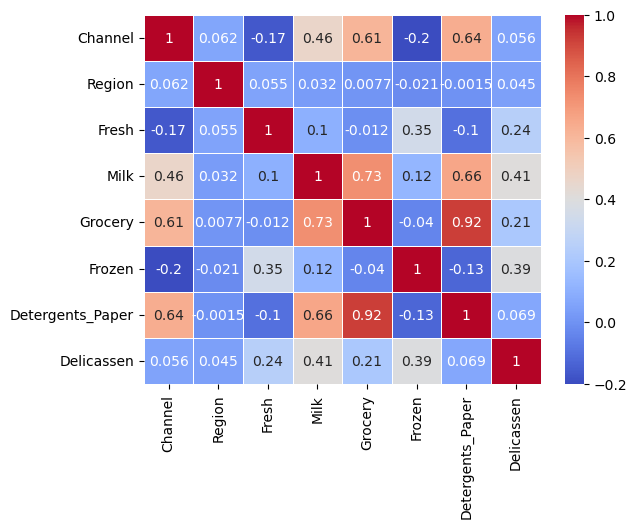

In [26]:
corr = customers.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
#Grocery and Detergents_Paper are very correlated

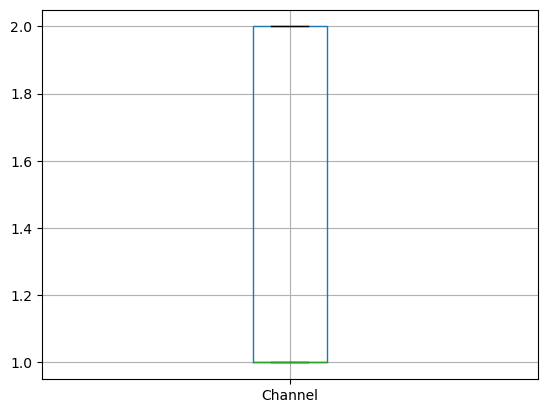

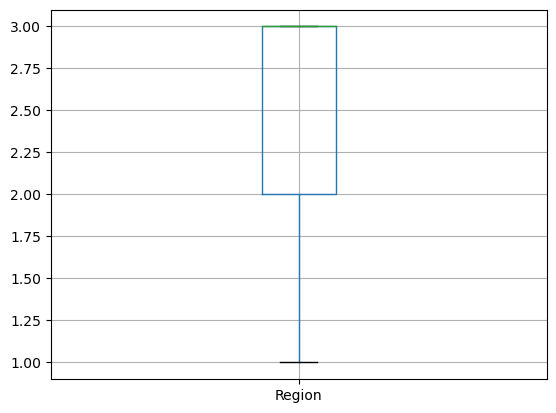

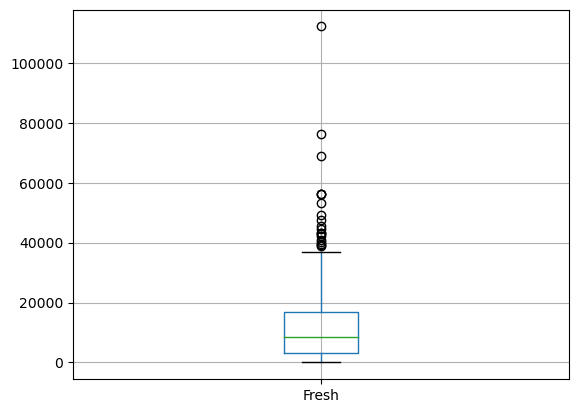

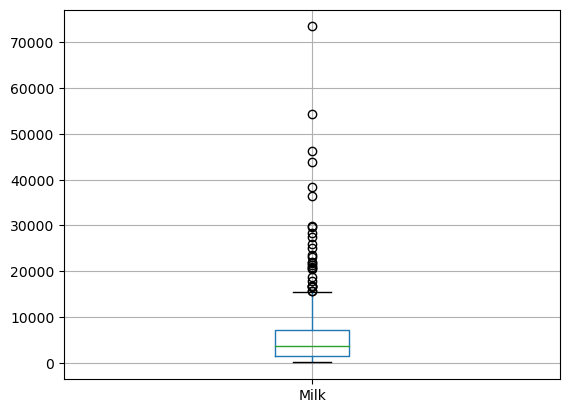

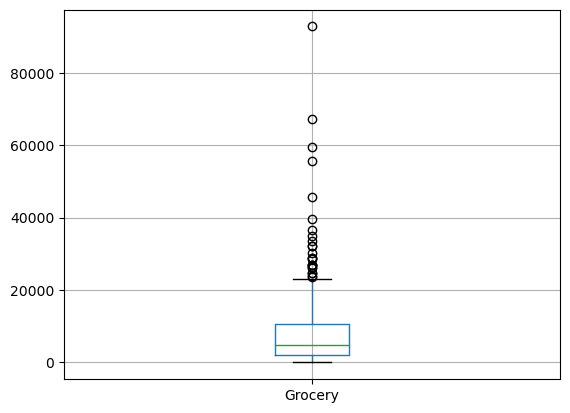

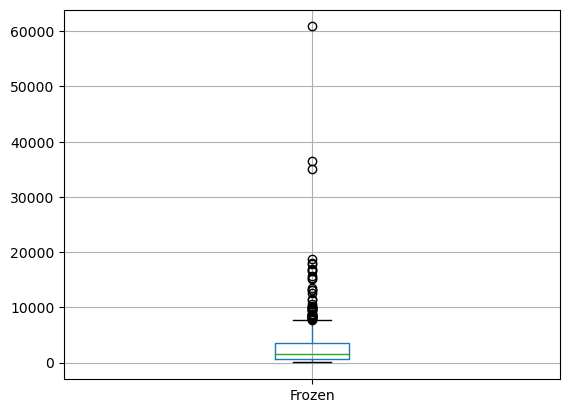

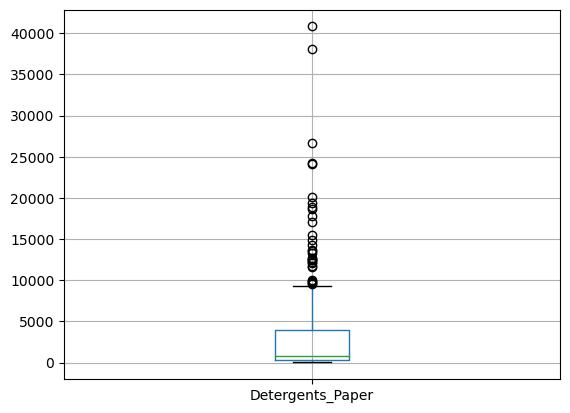

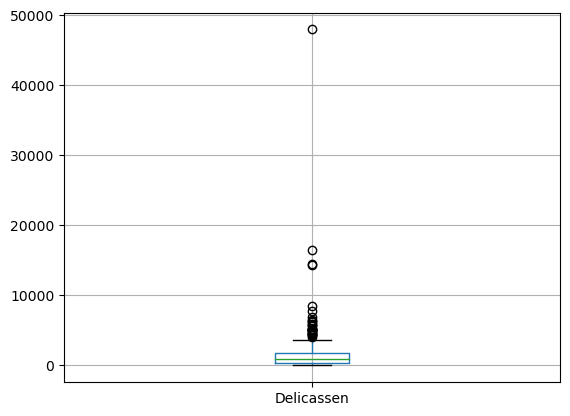

In [28]:
for column in customers:
    plt.figure()
    customers.boxplot([column])

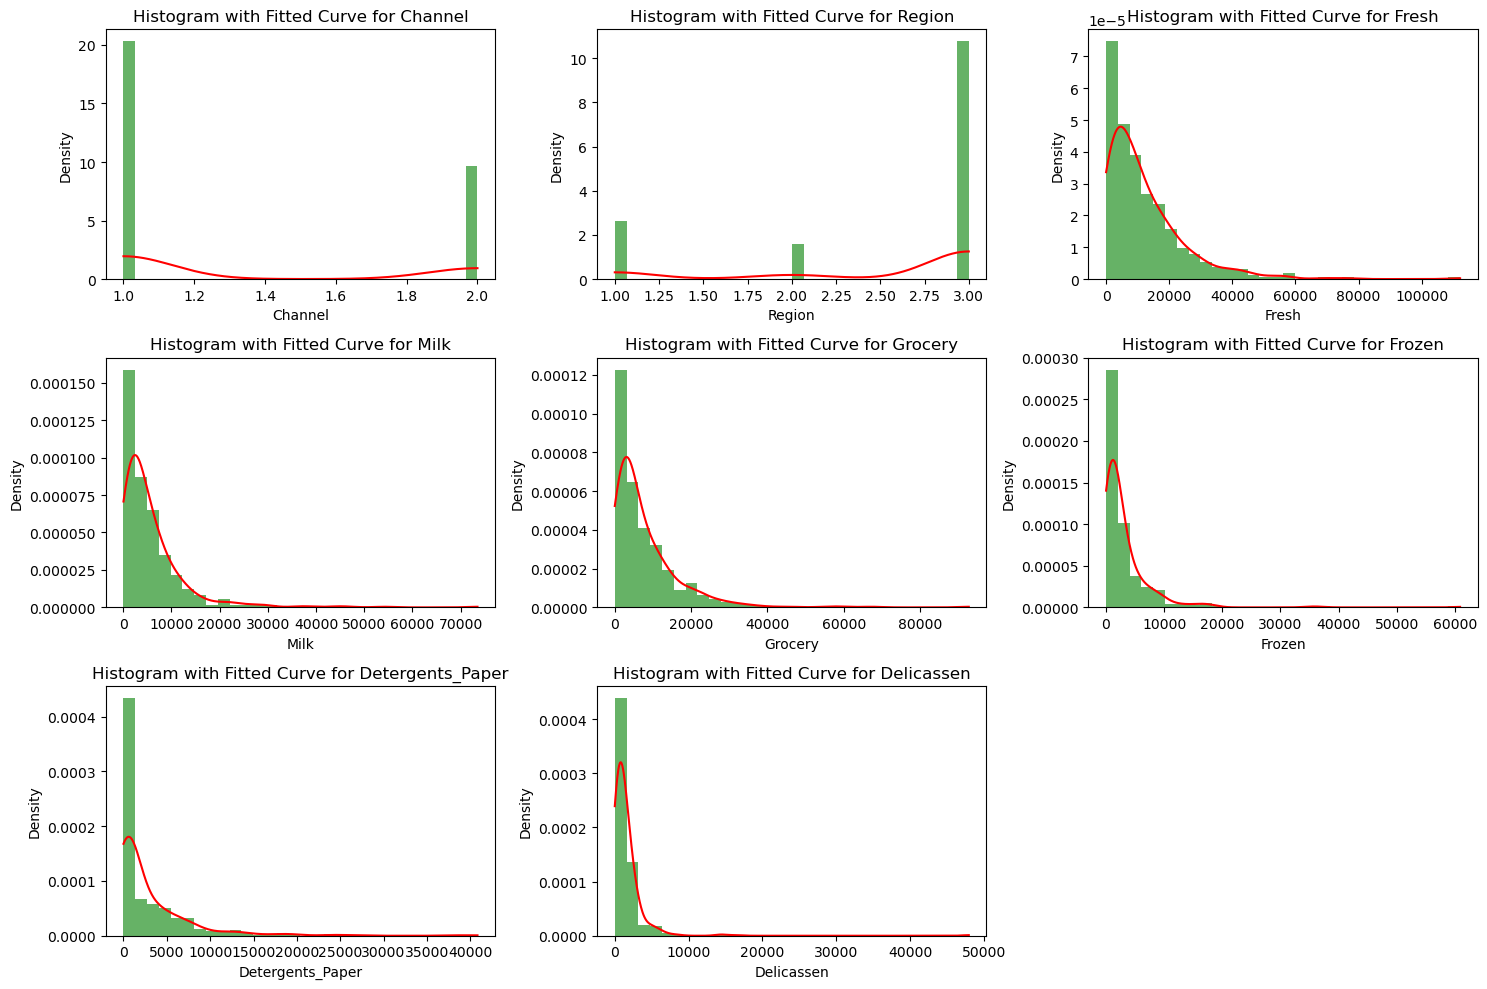

In [50]:
from scipy.stats import gaussian_kde

num_columns = customers.shape[1]

# Determine the grid size for subplots (you can adjust this based on the number of columns)
rows = int(np.ceil(num_columns ** 0.5))
cols = int(np.ceil(num_columns / rows))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten axes if it's more than 1D, ensure it's a numpy array
if rows * cols > 1:
    axes = axes.flatten()
else:
    axes = np.array([axes])

# Plot each column in a separate subplot
for i, column in enumerate(customers.columns):
    data = customers[column].to_numpy()  # Transform the column values to a NumPy array
    
    # Plot histogram
    axes[i].hist(data, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot fitted curve
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    axes[i].plot(x, kde(x), color='r')
    
    axes[i].set_title(f'Histogram with Fitted Curve for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Tus observaciones aquí**

+ Grocery, Detergents Paper tienen una gran correlacion
+ Todos tienen algun que otro outlier. Pero no los voy a eliminar
+ All data is squeued to the left
+ 



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [4]:
# Your code here


**Tus observaciones aquí**

+ Parece que...
+ 
+ 

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [66]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(customers)

# Convert the scaled data back to a DataFrame
scaled_customers = pd.DataFrame(scaled_data, columns=customers.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_customers.head())

scaled_customers.std()

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


Channel             1.001138
Region              1.001138
Fresh               1.001138
Milk                1.001138
Grocery             1.001138
Frozen              1.001138
Detergents_Paper    1.001138
Delicassen          1.001138
dtype: float64

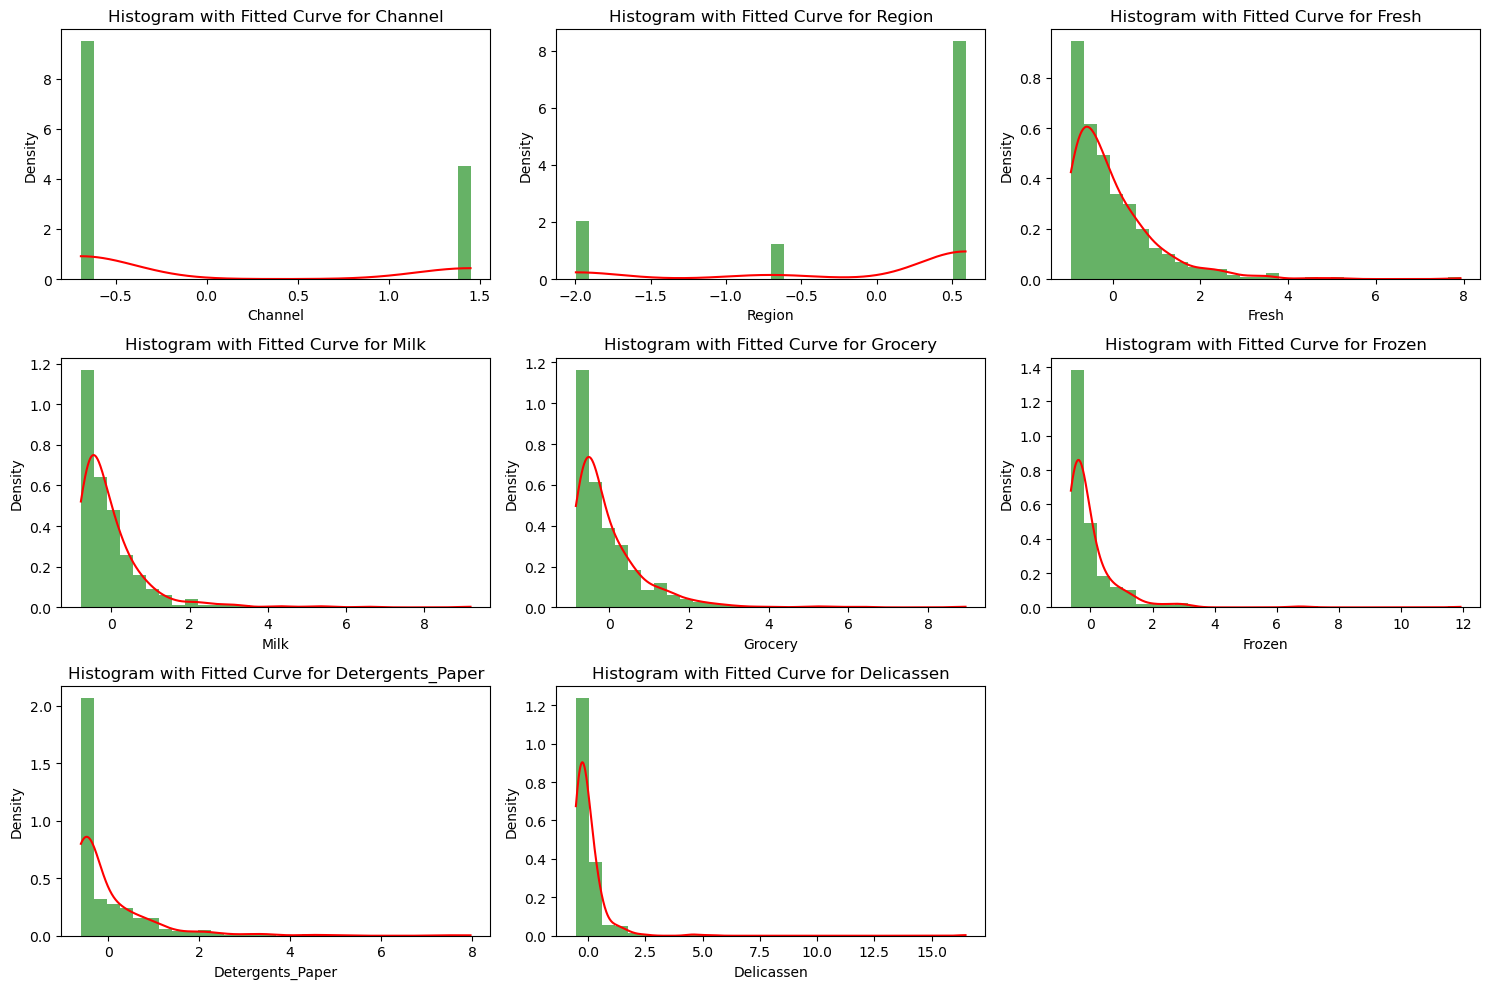

In [67]:
#Vistualize the same but after standardization
from scipy.stats import gaussian_kde

num_columns = scaled_customers.shape[1]

# Determine the grid size for subplots (you can adjust this based on the number of columns)
rows = int(np.ceil(num_columns ** 0.5))
cols = int(np.ceil(num_columns / rows))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten axes if it's more than 1D, ensure it's a numpy array
if rows * cols > 1:
    axes = axes.flatten()
else:
    axes = np.array([axes])

# Plot each column in a separate subplot
for i, column in enumerate(scaled_customers.columns):
    data = scaled_customers[column].to_numpy()  # Transform the column values to a NumPy array
    
    # Plot histogram
    axes[i].hist(data, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot fitted curve
    kde = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    axes[i].plot(x, kde(x), color='r')
    
    axes[i].set_title(f'Histogram with Fitted Curve for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [78]:
from sklearn.cluster import KMeans

model = KMeans()

fitted = model.fit(scaled_customers)

fitted.labels_

customers['labels'] = fitted.labels_

In [79]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,4
436,1,3,39228,1431,764,4510,93,2346,4
437,2,3,14531,15488,30243,437,14841,1867,6
438,1,3,10290,1981,2232,1038,168,2125,1


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [80]:
kmeans_2 = KMeans(n_clusters=2).fit(scaled_customers)

labels = kmeans_2.predict(scaled_customers)

clusters = kmeans_2.labels_.tolist()

In [82]:
scaled_customers['Label'] = clusters

Cuenta los valores en `labels`.

In [87]:
len(labels)

440

In [91]:
unique_values, counts = np.unique(labels, return_counts=True)
unique_counts = dict(zip(unique_values, counts))
unique_counts

{0: 134, 1: 306}

In [92]:
scaled_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [96]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)

dbscan.fit(scaled_customers)

scaled_customers['labels_DBSCAN']= dbscan.labels_.tolist()

scaled_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,-1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,-1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,-1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,-1
...,...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,-1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,-1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,-1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,1


Cuenta los valores en `labels_DBSCAN`.

In [98]:
labels_DBSCAN = dbscan.labels_
unique_values_dbscan, counts_dbscan = np.unique(labels_DBSCAN, return_counts=True)
unique_counts_dbscan = dict(zip(unique_values_dbscan, counts_dbscan))
unique_counts_dbscan

{-1: 255, 0: 5, 1: 130, 2: 5, 3: 5, 4: 7, 5: 22, 6: 6, 7: 5}

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [99]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

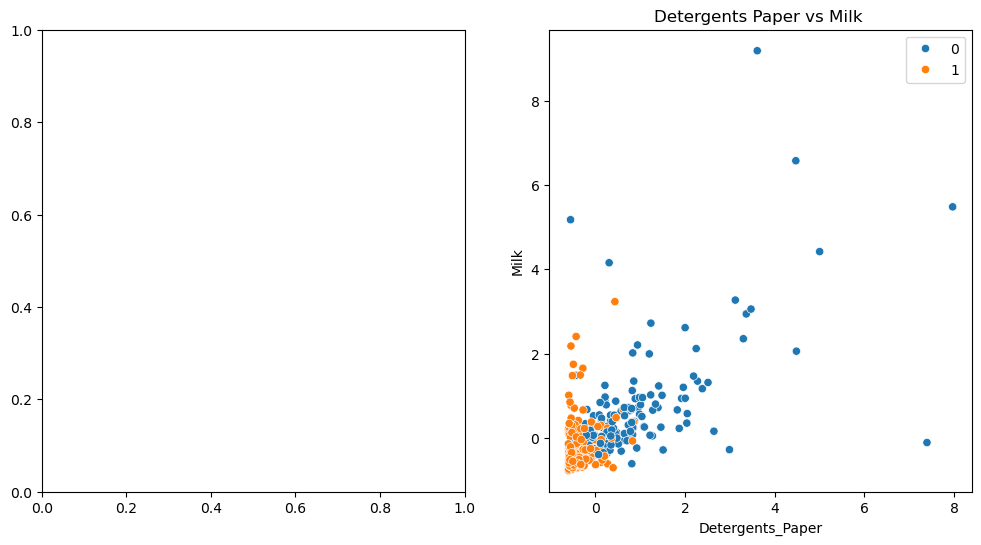

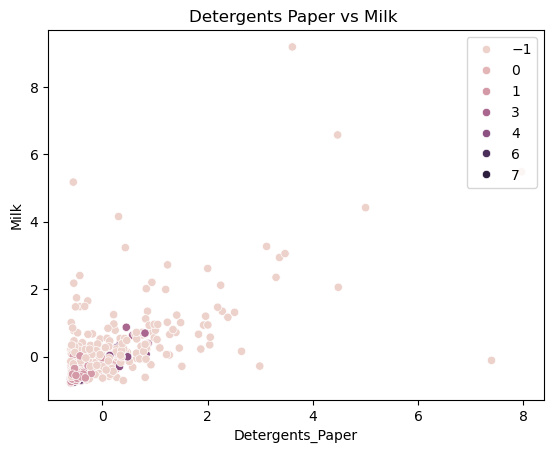

<Figure size 640x480 with 0 Axes>

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot(scaled_customers["Detergents_Paper"], scaled_customers["Milk"], labels)
plot(scaled_customers["Detergents_Paper"], scaled_customers["Milk"], labels_DBSCAN)
plt.tight_layout()
plt.show()


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

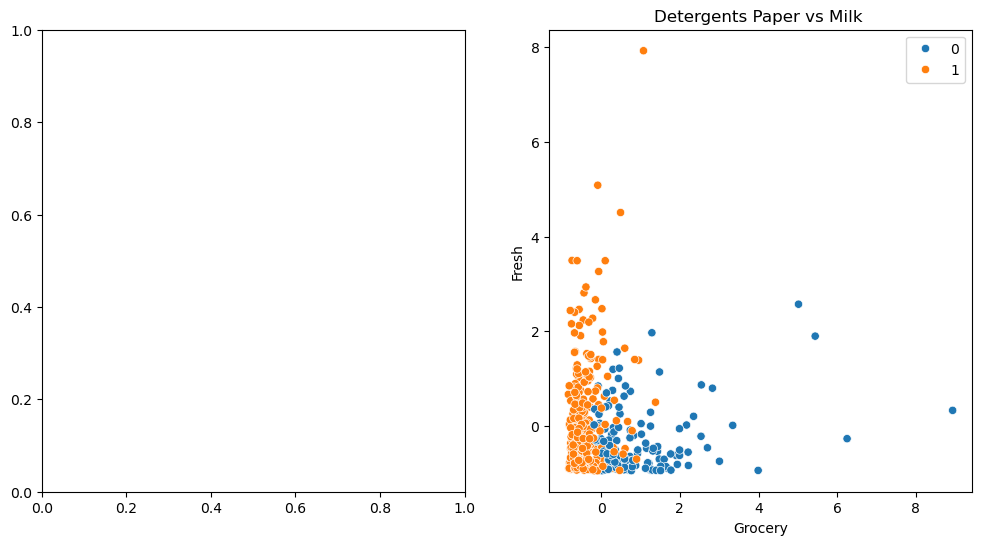

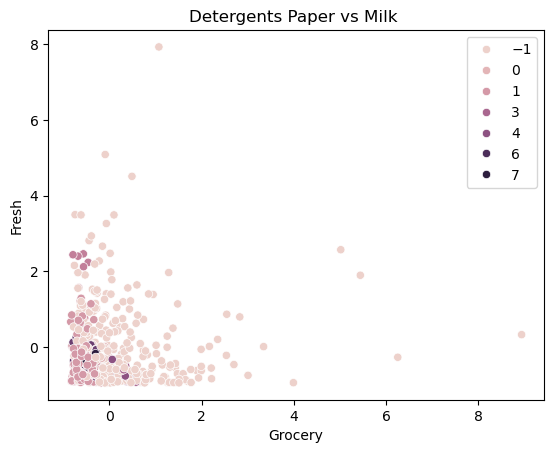

<Figure size 640x480 with 0 Axes>

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot(scaled_customers["Grocery"], scaled_customers["Fresh"], labels)
plot(scaled_customers["Grocery"], scaled_customers["Fresh"], labels_DBSCAN)
plt.tight_layout()
plt.show()


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

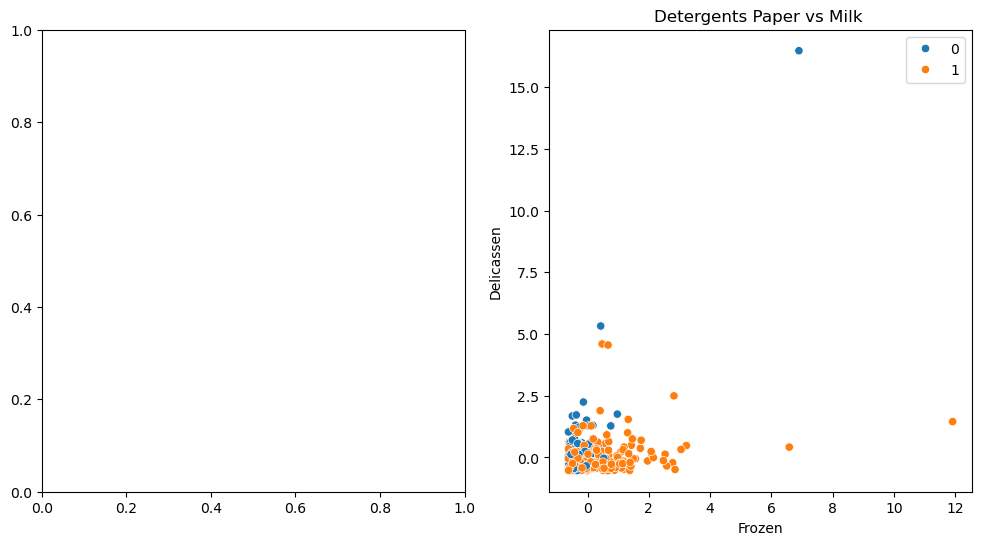

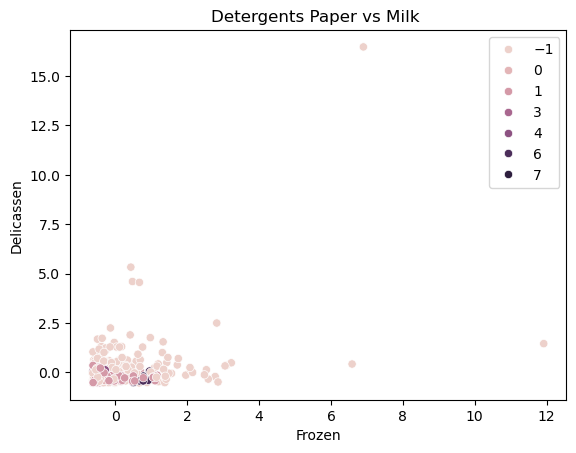

<Figure size 640x480 with 0 Axes>

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot(scaled_customers["Frozen"], scaled_customers["Delicassen"], labels)
plot(scaled_customers["Frozen"], scaled_customers["Delicassen"], labels_DBSCAN)
plt.tight_layout()
plt.show()


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [126]:
# Your code here:
grouped_kmeans = scaled_customers.groupby(labels)
grouped_dbscan = scaled_customers.groupby(labels_DBSCAN)

In [130]:
grouped_kmeans.mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
0,1.432689,0.117853,-0.281225,0.768997,0.963039,-0.275244,0.996418,0.212034,0.0,-0.552239
1,-0.627387,-0.051609,0.123151,-0.336750,-0.421723,0.120532,-0.436340,-0.092852,1.0,0.598039


In [131]:
grouped_dbscan.mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
-1,0.358207,-0.119217,0.136885,0.347752,0.372203,0.149113,0.309780,0.197238,0.541176,-1.0
0,1.448652,0.590668,-0.047439,-0.306575,-0.128764,-0.484978,0.142681,-0.449668,0.000000,0.0
1,-0.690297,0.590668,-0.227300,-0.533618,-0.582337,-0.193952,-0.500777,-0.277938,1.000000,1.0
2,-0.690297,0.590668,2.330913,-0.593472,-0.609298,-0.370277,-0.517654,-0.262725,1.000000,2.0
3,1.448652,0.590668,-0.763329,0.600725,0.412071,-0.507786,0.608619,-0.337985,0.000000,3.0
4,1.448652,0.590668,-0.707052,0.040639,0.253227,-0.428514,0.376715,0.107053,0.000000,4.0
5,-0.690297,-1.995342,-0.171174,-0.548618,-0.609922,-0.321448,-0.534924,-0.303818,1.000000,5.0
6,-0.690297,-1.995342,-0.409825,-0.522690,-0.587695,0.764752,-0.523890,-0.323478,1.000000,6.0
7,-0.690297,-0.702337,-0.356662,-0.577682,-0.481258,-0.102396,-0.557298,-0.207274,1.000000,7.0


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
